In [1]:
import gymnasium as gym
import torch.multiprocessing as mp
from tensoraerospace.agent.a3c.pytorch import Net, Worker
from tensoraerospace.agent.a3c.shared_optim import SharedAdam

In [2]:
env = gym.make('Pendulum-v1')
num_states = env.observation_space.shape[0]
num_actions = env.action_space.shape[0]

In [3]:
gnet = Net(num_states, num_actions)        # global network
gnet.share_memory()         # share the global parameters in multiprocessing
opt = SharedAdam(gnet.parameters(), lr=1e-7, betas=(0.9, 0.99))  # global optimizer

In [4]:
global_ep, global_ep_r, res_queue = mp.Value('i', 0), mp.Value('d', 0.), mp.Queue()

In [5]:
mp.cpu_count()

10

In [6]:
workers = [Worker(
                env=env,
                gnet=gnet,
                  opt=opt, 
                  global_ep=global_ep,
                  global_ep_r=global_ep_r,
                  res_queue=res_queue, 
                  name=i,
                  num_observations=num_states,
                  num_actions=num_actions,
                  MAX_EP=10000,
                  GAMMA=0.82,
                  MAX_EP_STEP=210,
                  update_global_iter=20
                  ) for i in range(10)]


In [7]:
[w.start() for w in workers]
res = []                    # record episode reward to plot
while True:
    r = res_queue.get()
    if r is not None:
        res.append(r)
    else:
        break
[w.join() for w in workers]

/Users/asmazaev/Projects/TensorAeroSpace/.venv/lib/python3.11/site-packages/gymnasium/envs/classic_control/pendulum.py:178: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("Pendulum-v1", render_mode="rgb_array")
  gym.logger.warn(
/Users/asmazaev/Projects/TensorAeroSpace/.venv/lib/python3.11/site-packages/gymnasium/envs/classic_control/pendulum.py:178: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("Pendulum-v1", render_mode="rgb_array")
  gym.logger.warn(


w3 Ep: 1 | Ep_r: -1305
w1 Ep: 5 | Ep_r: -1310
w2 Ep: 5 | Ep_r: -1310
w4 Ep: 5 | Ep_r: -1310
w7 Ep: 5 | Ep_r: -1310
w5 Ep: 7 | Ep_r: -1310
w6 Ep: 6 | Ep_r: -1310
w8 Ep: 8 | Ep_r: -1311
w9 Ep: 9 | Ep_r: -1313
w0 Ep: 10 | Ep_r: -1312
w3 Ep: 11 | Ep_r: -1315
w4w1 Ep: 13 | Ep_r: -1323
 Ep: 12 | Ep_r: -1321
w2 Ep: 14 | Ep_r: -1321
w5 Ep: 15 | Ep_r: -1323
w9w7 Ep: 16 | Ep_r: -1325
 Ep: 17w6 Ep: 18 | Ep_r: -1329
 | Ep_r: -1327
w8 Ep: 19 | Ep_r: -1331
w3 Ep: 20 | Ep_r: -1329
w0 Ep: 21 | Ep_r: -1329
w1 Ep: 22 | Ep_r: -1331
w4 Ep: 23 | Ep_r: -1328
w6 Ep: 24 | Ep_r: -1329
w5 Ep: 25 | Ep_r: -1324
w7 Ep: 26 | Ep_r: -1325
w2 Ep: 27 | Ep_r: -1325
w9 Ep: 28 | Ep_r: -1326
w8 Ep: 29 | Ep_r: -1323
w3 Ep: 30 | Ep_r: -1325
w0 Ep: 31 | Ep_r: -1327
w1 Ep: 32 | Ep_r: -1328
w4 Ep: 33 | Ep_r: -1330
w2 Ep: 34 | Ep_r: -1331
w6 Ep: 35 | Ep_r: -1332
w7 Ep: 36 | Ep_r: -1332
w5 Ep: 37 | Ep_r: -1333
w9 Ep: 38 | Ep_r: -1335
w3 Ep: 39 | Ep_r: -1334
w8 Ep: 40 | Ep_r: -1334
w4 Ep: 41 | Ep_r: -1332
w2 Ep: 42 | Ep_r: -1332
w

[None, None, None, None, None, None, None, None, None, None]

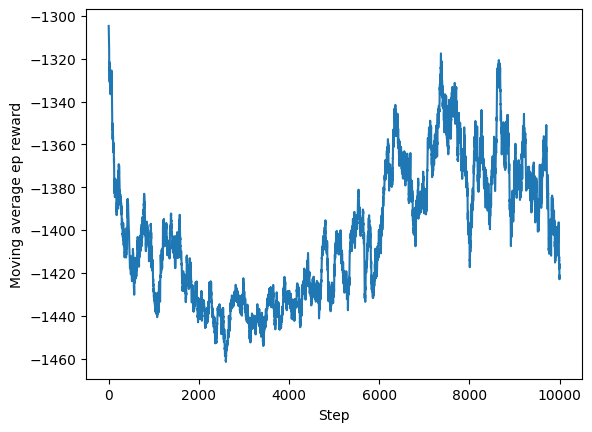

In [8]:
import matplotlib.pyplot as plt
plt.plot(res)
plt.ylabel('Moving average ep reward')
plt.xlabel('Step')
plt.show()